In [1]:
from hw2 import Uniform,Exponential,Xnorgenerator
from scipy.stats import chisquare,kstest
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

In [14]:
BINS = 100
uniform = Uniform()
uniform.switch_rng(Xnorgenerator())
uni = uniform.rvs(50000)

<Axes: ylabel='Count'>

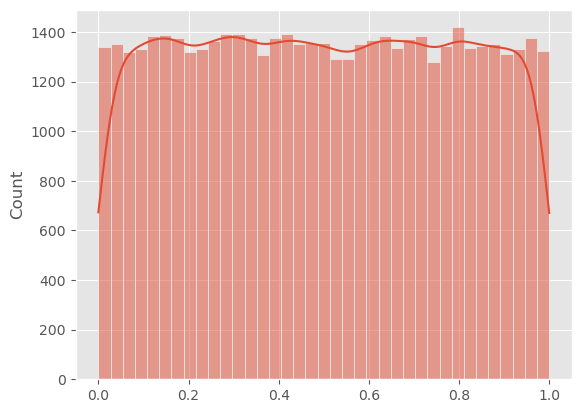

In [15]:
sns.histplot(uni,kde=True)

Power_divergenceResult(statistic=0.0017069600000000009, pvalue=1.0)

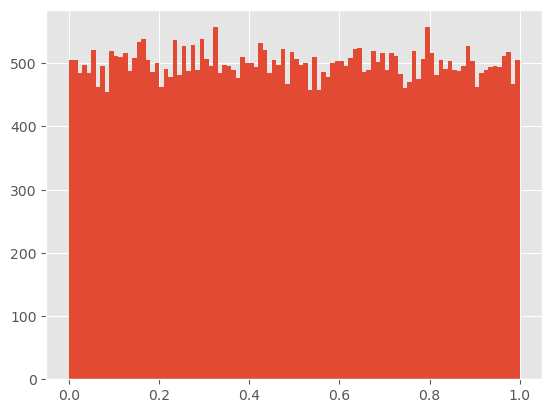

In [16]:
counts = plt.hist(uni,bins=BINS)[0]
total_freq = np.sum(counts)
obs_freq = counts/total_freq
obs_freq
exp_freq = 1 / BINS * np.ones(obs_freq.shape)
chisquare(obs_freq,exp_freq)

In [17]:
kstest(uni,stats.uniform.cdf)

KstestResult(statistic=0.0028109124131037166, pvalue=0.8233031426187576, statistic_location=0.4641890875868963, statistic_sign=1)

In [18]:
from hw2 import ks_distance
cdf = stats.uniform.cdf(x=np.linspace(0,1,num=1000))
diffs = []
for i in range(1000):
    diffs.append(ks_distance(uniform.rvs(1000), cdf))

<Axes: ylabel='Count'>

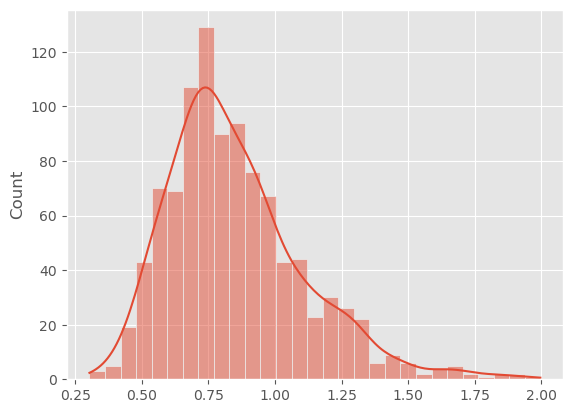

In [19]:
sns.histplot(diffs,kde=True)

In [8]:
exp = Exponential()
ys = exp.rvs(10000)

<Axes: ylabel='Density'>

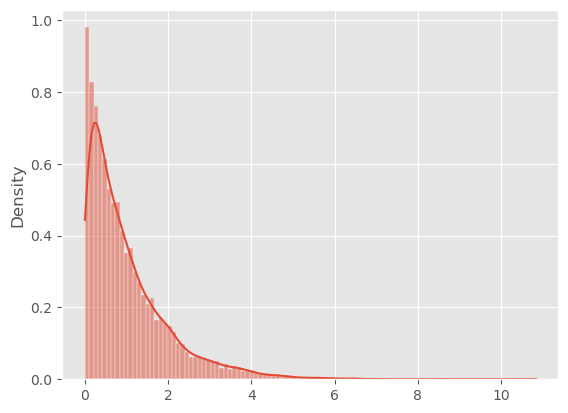

In [20]:
sns.histplot(ys,kde=True,stat='density')